In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fpath = '../results/injrecovresult/irresult_sap_top1.csv'
df = pd.read_csv(fpath)

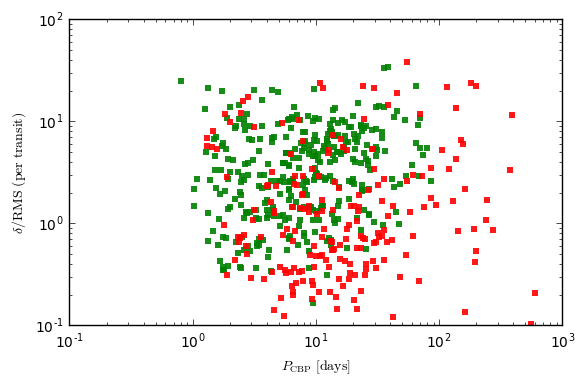

In [4]:
f, ax = plt.subplots()

ax.scatter(df['P_inj'][df['foundinj']==True],
           df['depth_inj'][df['foundinj']==True]/df['rms_biased'][df['foundinj']==True],
           c='green', lw=0, alpha=0.9, marker='s')
ax.scatter(df['P_inj'][df['foundinj']==False],
           df['depth_inj'][df['foundinj']==False]/df['rms_biased'][df['foundinj']==False],
           c='red', lw=0, alpha=0.9, marker='s')

ax.set(xlabel='$P_\mathrm{CBP}\ [\mathrm{days}]$',
       ylabel='$\delta/\mathrm{RMS\ (per\ transit)}$',
       xscale='log',
       yscale='log')

f.tight_layout()
plt.show()

In [28]:
df[['found', 'SNR', 'P_inj']].head()

,found,SNR,P_inj
0,1,1.566569,3.825723
1,1,1.633066,6.886792
2,0,0.762424,2.600830
3,0,0.141397,4.534708
4,0,3.437157,9.219064


In [48]:
xgrid = np.logspace(-1,3,13)
ygrid = np.logspace(-1,2,10)

xbins = [(float(xgrid[i]), float(xgrid[i+1])) for i in range(len(xgrid)-1)]
ybins = [(float(ygrid[i]), float(ygrid[i+1])) for i in range(len(ygrid)-1)]

In [49]:
xgrid

array([  1.00000000e-01,   2.15443469e-01,   4.64158883e-01,
         1.00000000e+00,   2.15443469e+00,   4.64158883e+00,
         1.00000000e+01,   2.15443469e+01,   4.64158883e+01,
         1.00000000e+02,   2.15443469e+02,   4.64158883e+02,
         1.00000000e+03])

In [50]:
xbins

[(0.1, 0.21544346900318834),
 (0.21544346900318834, 0.46415888336127786),
 (0.46415888336127786, 1.0),
 (1.0, 2.1544346900318834),
 (2.1544346900318834, 4.6415888336127775),
 (4.6415888336127775, 10.0),
 (10.0, 21.54434690031882),
 (21.54434690031882, 46.41588833612777),
 (46.41588833612777, 100.0),
 (100.0, 215.44346900318823),
 (215.44346900318823, 464.15888336127773),
 (464.15888336127773, 1000.0)]

In [119]:
from itertools import product

# we want ones and zeros for found/not found.
df['found'] = list(map(int, df['foundinj']))
df['SNR'] = df['depth_inj']/df['rms_biased']

# for half-log bins:
#xgrid = np.logspace(-1,3,9)
#ygrid = np.logspace(-1,2,7)

xgrid = np.logspace(-1,3,13)
ygrid = np.logspace(-1,2,10)
xbins = [(float(xgrid[i]), float(xgrid[i+1])) for i in range(len(xgrid)-1)]
ybins = [(float(ygrid[i]), float(ygrid[i+1])) for i in range(len(ygrid)-1)]

P = np.array(df['P_inj'])
SNR = np.array(df['SNR'])
found = np.array(df['found'])

results = []
for (Pmin, Pmax), (SNRmin, SNRmax) in product(xbins, ybins):
        # get inj/recov expts in this bin
        sel = (P > Pmin) & (P < Pmax)
        sel &= (SNR > SNRmin) & (SNR < SNRmax)
        
        thisP, thisSNR, thisfound = P[sel], SNR[sel], found[sel]
        
        thisDenom = len(found[sel])
        thisNum = len(thisfound[thisfound==1])
        
        if thisDenom > 0:
            thisFrac = thisNum/thisDenom
        else:
            thisFrac = 0.
            
        results.append(thisFrac)

results = np.reshape(results, (len(xbins),len(ybins)))

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


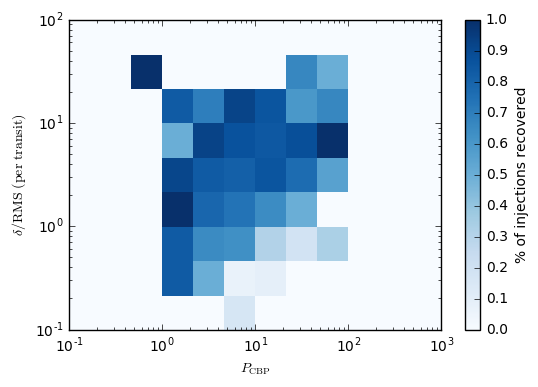

In [126]:
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext

plt.close('all')
f, ax = plt.subplots()
im = ax.pcolor(xgrid, ygrid, results.T, cmap='Blues')
#plt.axvline(100, color='red')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('$\delta/\mathrm{RMS}\ (\mathrm{per\ transit})$')
ax.set_xlabel('$P_\mathrm{CBP}$')

cb = f.colorbar(im, orientation='vertical')
cb.set_label('% of injections recovered')
f.savefig('plots/completeness_demo.pdf')
f.show()

In [ ]:
cb.se

In [111]:
np.max(results)

0.10740740740740741

In [112]:
xgrid

array([  1.00000000e-01,   3.16227766e-01,   1.00000000e+00,
         3.16227766e+00,   1.00000000e+01,   3.16227766e+01,
         1.00000000e+02,   3.16227766e+02,   1.00000000e+03])

In [113]:
ygrid

array([   0.1       ,    0.31622777,    1.        ,    3.16227766,
         10.        ,   31.6227766 ,  100.        ])

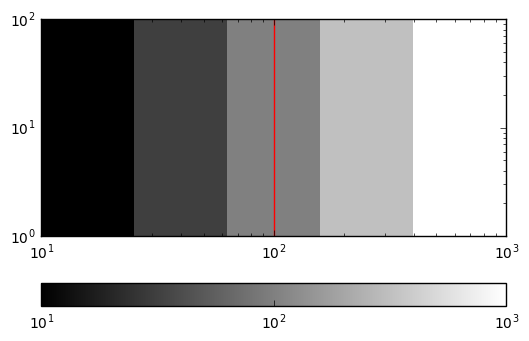

In [84]:
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext

x=np.logspace(1, 3, 6)
y=np.logspace(0, 2,3)
X,Y=np.meshgrid(x,y)
z = np.logspace(np.log10(10), np.log10(1000), 5)
Z=np.vstack((z,z))

im = plt.pcolor(X,Y,Z, cmap='gray', norm=LogNorm())
plt.axvline(100, color='red')

plt.xscale('log')
plt.yscale('log')

plt.colorbar(im, orientation='horizontal',format=LogFormatterMathtext())
plt.show()

In [85]:
np.shape(X)

(3, 6)

In [86]:
np.shape(Y)

(3, 6)

In [87]:
np.shape(Z)

(2, 5)

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/image.py:375: UserWarning: Images are not supported on non-linear axes.
  warnings.warn("Images are not supported on non-linear axes.")


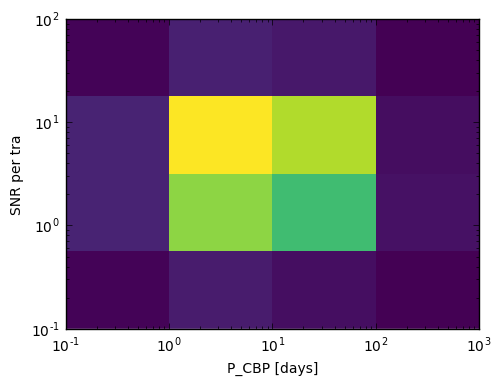

In [83]:
extent = [xgrid[0], xgrid[-1], ygrid[0], ygrid[-1]]
 
# Plot heatmap
plt.close('all')
f, ax = plt.subplots()

ax.imshow(heatmap,
          extent=extent,
          interpolation='none',
          cmap='viridis')

ax.set(xscale='log', yscale='log')
ax.set_ylabel('SNR per tra')
ax.set_xlabel('P_CBP [days]')

f.show()

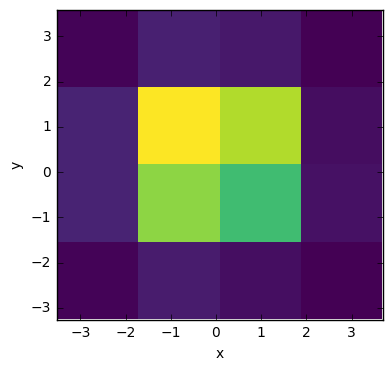

In [62]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
 
# Create data
x = np.random.randn(4096)
y = np.random.randn(4096)
 
# Create heatmap
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(4,4))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
 
# Plot heatmap
plt.clf()
plt.ylabel('y')
plt.xlabel('x')
plt.imshow(heatmap, extent=extent, interpolation='none', cmap='viridis')
plt.show()

In [63]:
xedges

array([-3.51501192, -1.715148  ,  0.08471592,  1.88457984,  3.68444376])

In [72]:
len(xedges)

5

In [64]:
np.shape(heatmap)

(4, 4)

In [46]:
list(product(xbins, ybins))[:5]

[(0.10000000000000001, 0.10000000000000001),
 (0.10000000000000001, 0.21544346900318834),
 (0.10000000000000001, 0.46415888336127786),
 (0.10000000000000001, 1.0),
 (0.10000000000000001, 2.1544346900318834)]

In [47]:
len(list(product(xbins, ybins)))

130

In [ ]:
product

## see ~line 37 of DFM's `occurrence.py`

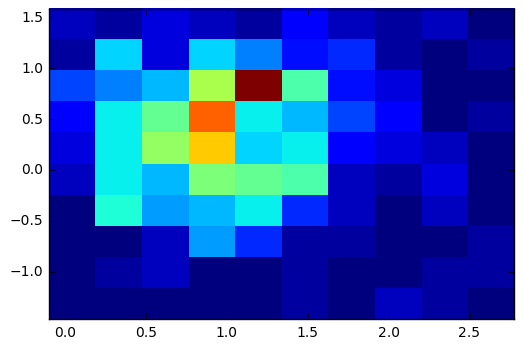

In [8]:
f, ax = plt.subplots()

ax.hist2d(np.log10(df['P_inj']), np.log10(df['depth_inj']/df['rms_biased']))
#ax.set(xscale='log',yscale='log')
plt.show()